In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split

plt.style.use('ggplot')
%matplotlib inline

In [412]:
hd_Train = pd.read_csv('train.csv')
hd_Test = pd.read_csv('test.csv')

In [413]:
Test = pd.DataFrame(data=hd_Test)
Train = pd.DataFrame(data=hd_Train)

In [414]:
NA_Train = Train.dropna(axis=1, how='any', thresh=None)
#NA_Train.drop(~['Id', 'LotArea', 'BldgType', 'OverallQual', 'SalePrice'], axis = 1, inplace=True)

In [415]:
col_list = [0,1,3,15,16,17,18,26,27,28,29,33,34,36,37,38,39,40,41,42,44,46,47,48,50,51,52,53,54,55,56,57,58,61]
NA_Train = NA_Train[col_list]

In [416]:
from sklearn.linear_model import LinearRegression
X = NA_Train.drop('SalePrice', axis = 1)

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [417]:
#OneFam = NA_Train.loc[Train['BldgType'] == '1Fam']
#Dup = NA_Train.loc[Train['BldgType'] == 'Duplex']
#TwoFam = NA_Train.loc[Train['BldgType'] == '2fmCon']
#Twn = NA_Train.loc[Train['BldgType'].isin(['TwnhsE', 'Twnhs'])]

In [418]:
lm.fit(X, NA_Train.SalePrice, NA_Train.GarageCars)
#lm.fit(X, NA_Train.SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [419]:
print('est coef:', lm.intercept_)
print('# of coef:', len(lm.coef_))

est coef: 313802.379094
# of coef: 33


In [420]:
coef = pd.DataFrame(X.columns, lm.coef_)
coef.sort_index()

,0
-22928.773456,KitchenAbvGr
-11963.644434,BedroomAbvGr
-1536.618042,HalfBath
-579.595813,YrSold
-377.684651,MoSold
-191.910437,MSSubClass
-23.466146,PoolArea
-20.794580,OpenPorchSF
-2.449906,EnclosedPorch
-2.239066,BsmtUnfSF


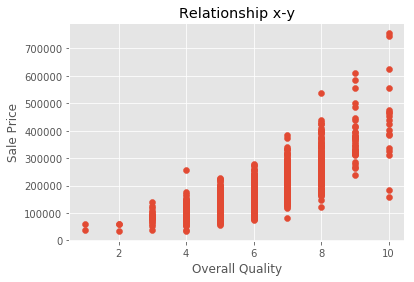

In [421]:
plt.scatter(NA_Train.OverallQual, NA_Train.SalePrice)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Relationship x-y')
plt.show()

In [422]:
lm.predict(X)[0:5]

array([ 229688.45538297,  202897.59824492,  220755.8882877 ,
        207066.83366239,  297183.38506226])

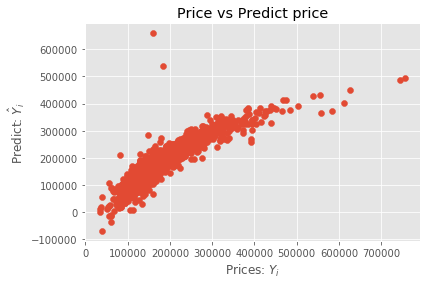

In [423]:
plt.scatter(NA_Train.SalePrice, lm.predict(X))
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predict: $\hat{Y}_i$')
plt.title('Price vs Predict price')

In [424]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, NA_Train.SalePrice)

In [425]:
lm.fit(X_Train, Y_Train)
pred_train = lm.predict(X_Train)
pred_test = lm.predict(X_Test)

In [426]:
print('X_Train fit with Y_Train:', np.mean((Y_Train - lm.predict(X_Train)) ** 2))
print('X_Train fit with X_Test, Y_Test:', np.mean((Y_Test - lm.predict(X_Test)) ** 2))

X_Train fit with Y_Train: 983115327.8536849
X_Train fit with X_Test, Y_Test: 2088786419.3903246


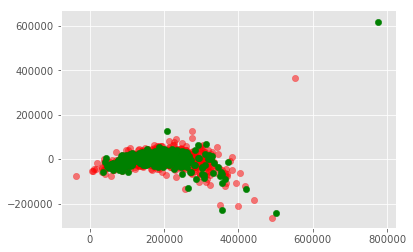

In [427]:
plt.scatter(lm.predict(X_Train), lm.predict(X_Train) - Y_Train, c='r', s=40, alpha=0.5)
plt.scatter(lm.predict(X_Test), lm.predict(X_Test) - Y_Test, c='g', s=40)

In [428]:
pred = lm.predict(X)

In [429]:
pred = pd.DataFrame(pred, columns=['SalePrice'])
pred.head(3)

,SalePrice
0,227535.596154
1,198948.987674
2,223333.913746


In [433]:
xcol = [0]
Filter_X = X[xcol]
Filter_X.head(3)

,Id
0,1
1,2
2,3


In [431]:
Filter_X['SalePrice'] = pred

C:\Users\viper\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [432]:
Filter_X.to_csv('CUBDS_DM_prediction.csv')